# Introduction
    - Making histogram figure
    
# Organization
    - histogram of irEC
    - histogram of Thermal Conductivity

# Guide
    - In making the histogram, all the setup codes must be executed first.

# Setup

## Variables
    - df_gpair: all the good info in one place
    - df: ec, lamd, and com_dist data for some trajectory
    - vdw
    - hbond
    - ionic
    - pipistack
    - undef: pairs that are not vdw, hbond, ionic, or pipistack, includes backbone

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
# Importing Data

df_gpair = pd.read_csv('out/gpair_info.csv', index_col=0)

ec_contact = np.load('out/ec_contact.npy')
ec_backbone = np.load('out/ec_backbone.npy')
lamd_contact = np.load('out/lamd_contact.npy')
lamd_backbone = np.load('out/lamd_backbone.npy')

In [4]:
# combine bb and ct data into one for some trajectory

traj_id = 2 

ec_tmp = []
lamd_tmp = []
bb_count = 0
ct_count = 0
for i, element in enumerate(df_gpair.is_backbone):
    if element:
        ec_tmp.append(ec_backbone.transpose()[traj_id][bb_count])
        lamd_tmp.append(lamd_backbone.transpose()[traj_id][bb_count])
        bb_count += 1
    else:
        ec_tmp.append(ec_contact.transpose()[traj_id][ct_count])
        lamd_tmp.append(lamd_contact.transpose()[traj_id][ct_count])
        ct_count += 1

df_ec = pd.DataFrame(data=ec_tmp, columns=['ec_'+str(traj_id)])
df_lamd = pd.DataFrame(data=lamd_tmp, columns=['lamd_'+str(traj_id)])

# import com dist as well
com_dist = np.load('crd_analysis/com_dist_00'+str(traj_id)+'.npy')
df_com_dist = pd.DataFrame(data=com_dist, columns=['com_dist_'+str(traj_id)])

df = df_ec.join(df_lamd).join(df_com_dist)

In [5]:
# Labels

vdw = df_gpair.major_inter == 'VDW'
hbond = df_gpair.major_inter == 'HBOND'
ionic = df_gpair.major_inter == 'IONIC'
pipistack = df_gpair.major_inter == 'PIPISTACK'
undef = df_gpair.major_inter == 'undef'

# irEC histogram

/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, 

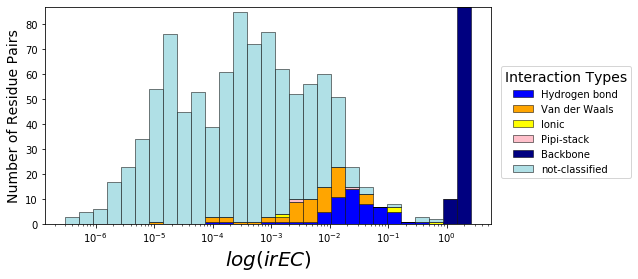

In [49]:
logbins = np.logspace(np.log10(min(df.ec_2)), np.log10(max(df.ec_2)), 30)

fig = plt.figure()
fig.set_size_inches(8, 4)
ax = fig.add_subplot(111)
ax.hist((df[hbond].ec_2, df[vdw].ec_2,
        df[ionic].ec_2, df[pipistack].ec_2,
        df[df_gpair.is_backbone].ec_2,df[undef][~df_gpair.is_backbone].ec_2),
        bins=logbins, histtype='barstacked',
        label=["Hydrogen bond","Van der Waals","Ionic","Pipi-stack", "Backbone","not-classified"],
        color=['blue','orange','yellow','pink','navy','powderblue'],
        edgecolor='black', linewidth=0.5)

plt.xlabel(r'$log(irEC)$', fontsize=20)
plt.ylabel('Number of Residue Pairs', fontsize=14)
ax.legend(title='Interaction Types', fontsize=10, title_fontsize=14, bbox_to_anchor=(1.01, 0.75))
plt.xscale('log')
plt.savefig("fig/irec_histogram_interactions", dpi=300, bbox_inches = 'tight')

# Thermal Conductivity histogram

/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, 

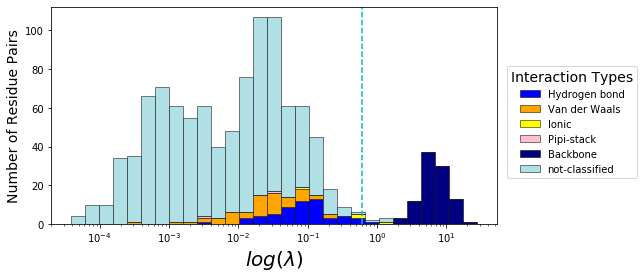

In [50]:
logbins = np.logspace(np.log10(min(df.lamd_2)), np.log10(max(df.lamd_2)), 30)

fig = plt.figure()
fig.set_size_inches(8, 4)
ax = fig.add_subplot(111)
ax.hist((df[hbond].lamd_2, df[vdw].lamd_2,
        df[ionic].lamd_2, df[pipistack].lamd_2,
        df[df_gpair.is_backbone].lamd_2,df[undef][~df_gpair.is_backbone].lamd_2),
        bins=logbins, histtype='barstacked', 
        label=["Hydrogen bond","Van der Waals","Ionic","Pipi-stack", "Backbone","not-classified"],
        color=['blue','orange','yellow','pink','navy','powderblue'],
        edgecolor='black', linewidth=0.5)

water_tcond = 0.6096  # W/(m.s) at 300 K

ax.axvline(water_tcond, ls='--', color='c')

#plt.title('Distribution of irHC for identified interactions')
plt.xlabel(r'$log(\lambda)$', fontsize=20)
plt.ylabel('Number of Residue Pairs', fontsize=14)
ax.legend(title='Interaction Types', fontsize=10, title_fontsize=14, bbox_to_anchor=(1.01, 0.75))
plt.xscale('log')
plt.savefig("fig/lambda_histogram_interactions", dpi=300, bbox_inches = 'tight')

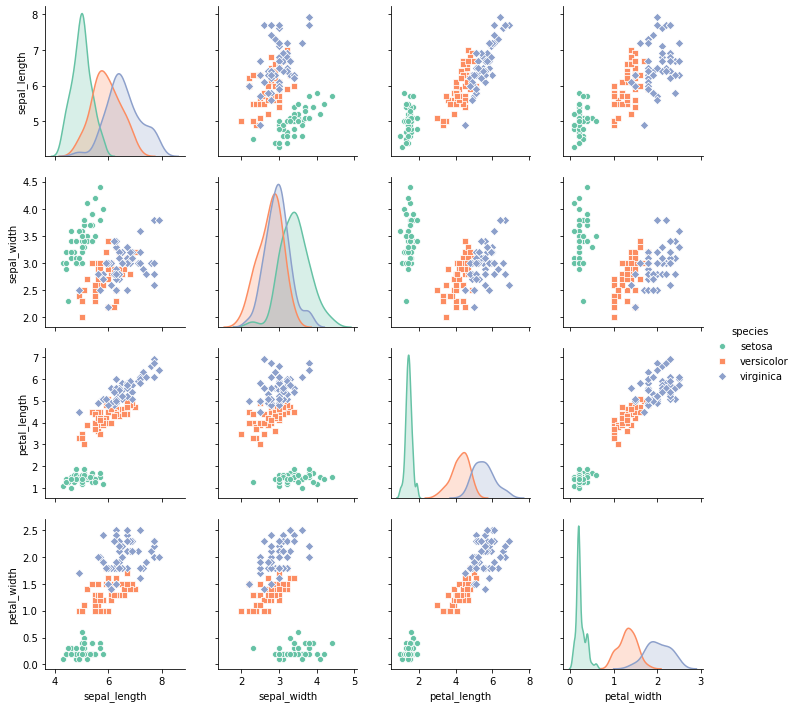

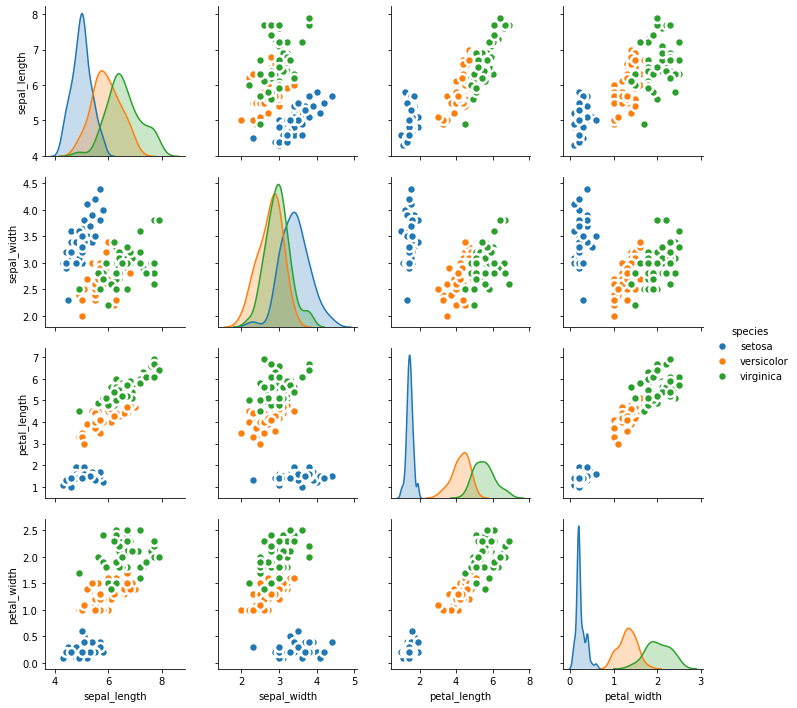

In [160]:
# PAIRPLOT EXAMPLE from internet

# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')
 
# left
sns.pairplot(df, kind="scatter", hue="species", markers=["o", "s", "D"], palette="Set2")
plt.show()

# right: you can give other arguments with plot_kws.
#sns.pairplot(df, kind="scatter", hue="species", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
#plt.show()


/Users/genkikubota/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


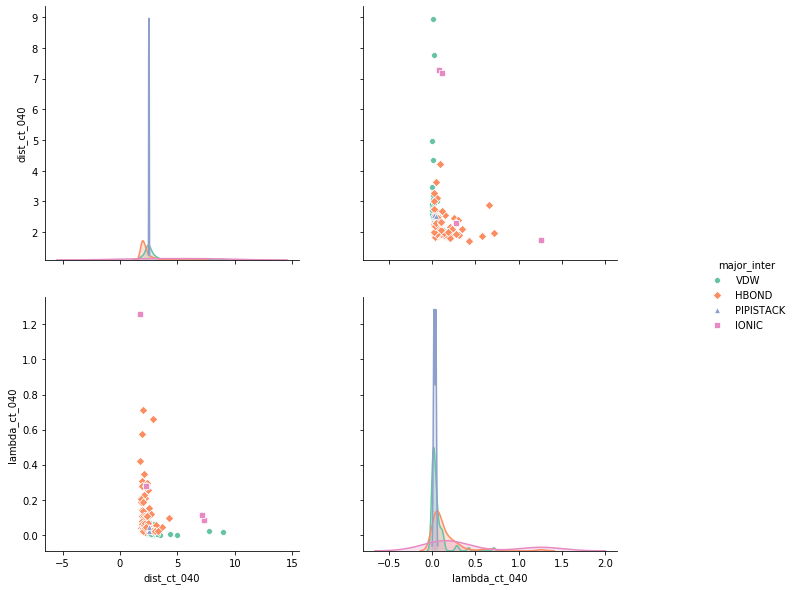

In [8]:
grid = sns.pairplot(df_inter[['major_inter', 'dist_ct_040', 'lambda_ct_040']], 
                    #kind="scatter", 
                    hue_order = ['VDW', 'HBOND', 'PIPISTACK', 'IONIC'], 
                    # diag_kind = 'hist',
                    hue="major_inter", markers=['o', 'D', '^', 's'], palette="Set2")

grid.fig.set_size_inches(12, 9)

plt.show()


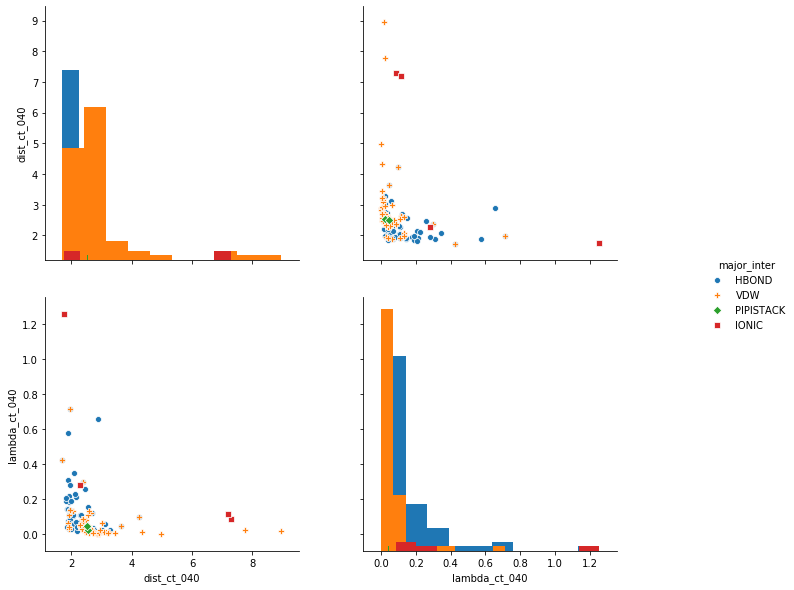

In [10]:
# holly shit this is powerful

grid = sns.pairplot(df_inter[['major_inter', 'dist_ct_040', 'lambda_ct_040']], 
                    #kind="scatter", 
                    hue_order = ['HBOND', 'VDW', 'PIPISTACK', 'IONIC'], 
                    diag_kind = 'hist',
                    hue="major_inter", markers=['o', 'P', 'D', 's'])#, palette="Set2")

grid.fig.set_size_inches(12, 9)

plt.savefig('histogram')

plt.show()

# right bottom distribution: distributions are normalized
# judging from the mean of the distribution we see, in terms of thermal conductivity, ionic > hbond > vdw
# I really want to analyze VDW contacts

# Manipulations to df_inter
    # took the log of lambda_ct_040
    # ignored ionic and pipistack here because they are minorities...
        # ionic ids: 5, 11, 85, 123, pipistack ids: 63, 65